In [34]:
import nibabel as nib
import numpy as np

# Load CT volume
ct_nii = nib.load("../data/2/volume-111.nii")
ct = ct_nii.get_fdata()

# Load segmentation
seg_nii = nib.load("../data/2/segmentation-111.nii")
seg = seg_nii.get_fdata()

print("CT shape:", ct.shape)
print("Seg shape:", seg.shape)

CT shape: (512, 512, 761)
Seg shape: (512, 512, 761)


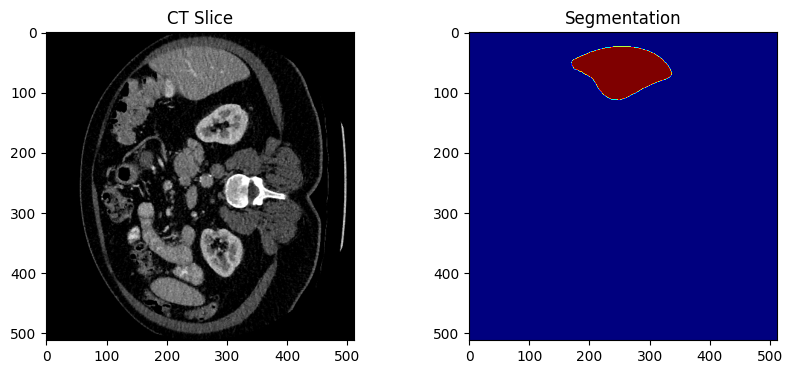

In [35]:
import matplotlib.pyplot as plt

# Clip HU to [-100, 400] (liver window)
ct = np.clip(ct, -100, 400)
# # Normalize 0–1
# ct = (ct + 100) / 500

# slice_idx = ct.shape[2] // 2  # middle slice
slice_idx = 300  

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(ct[:, :, slice_idx], cmap="gray")
plt.title("CT Slice")

# save the ct slice as png
plt.imsave("ct_slice.png", ct[:, :, slice_idx], cmap="gray")

plt.subplot(1,2,2)
plt.imshow(seg[:, :, slice_idx], cmap="jet")
plt.title("Segmentation")

plt.show()

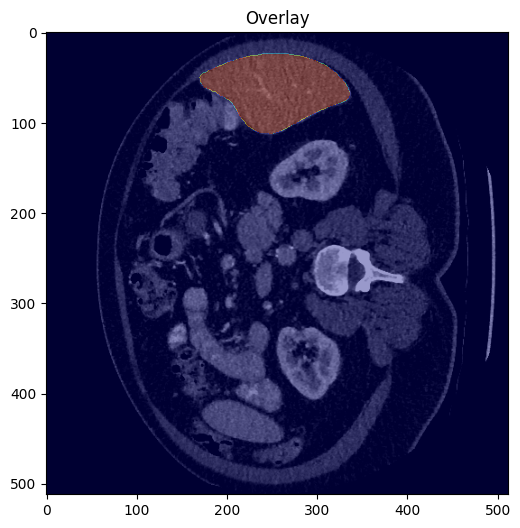

In [36]:
plt.figure(figsize=(6,6))
plt.imshow(ct[:, :, slice_idx], cmap="gray")
plt.imshow(seg[:, :, slice_idx], cmap="jet", alpha=0.4)
plt.title("Overlay")
plt.show()

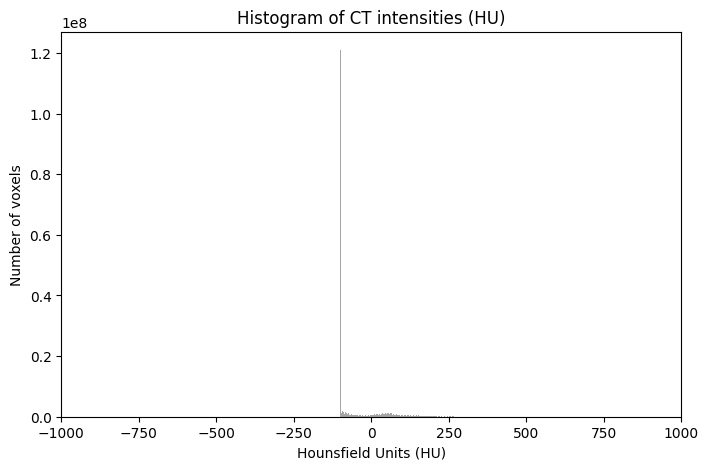

In [37]:
ct_flat = ct.flatten()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(ct_flat, bins=200, color='gray', alpha=0.7)
plt.title("Histogram of CT intensities (HU)")
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Number of voxels")
plt.xlim([-1000, 1000])  # typical HU range
plt.show()